In [65]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
complaints_data = pd.read_csv('complaints.csv')
complaints_data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [67]:
product = complaints_data['Product'].value_counts()

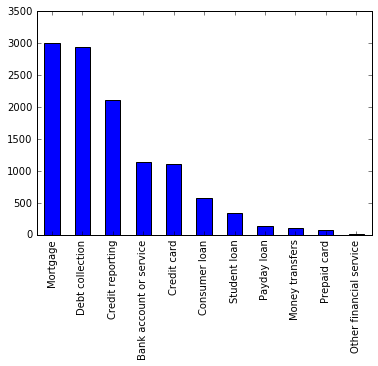

In [68]:
product.plot(kind='bar', color='blue')

In [69]:
top_companies = complaints_data['Company'].value_counts().head(10)

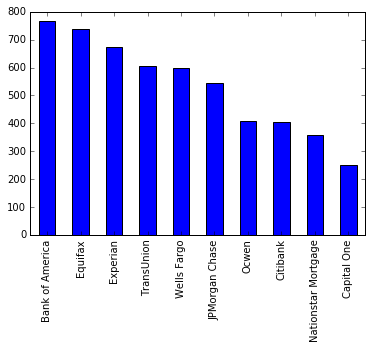

In [70]:
top_companies.plot(kind='bar', color='blue')

In [71]:
company_response = complaints_data['Company response'].value_counts()

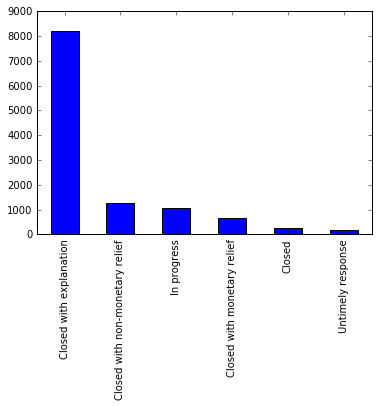

In [72]:
company_response.plot(kind='bar', color='blue')

In [73]:
date = complaints_data.pop('Date sent to company')

In [74]:
complaints_data.index = pd.to_datetime(date)

In [75]:
complaints_data['Week day'] = complaints_data.index.to_series().map(lambda d: d.weekday())

In [76]:
complaints_data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Company,Company response,Timely response?,Consumer disputed?,Week day
Date sent to company,,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2


In [101]:
complaints_data[complaints_data['Week Day'] == 0]


KeyError: 'Week Day'

In [78]:
complaints_data

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Company,Company response,Timely response?,Consumer disputed?,Week day
Date sent to company,,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2
2014-12-31,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN,2
2015-01-07,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322.0,Web,12/31/2014,Amex,Closed with explanation,Yes,NaN,2
2015-01-07,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023.0,Web,12/31/2014,Speedy Cash Holdings,Closed,Yes,NaN,2
2014-12-31,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045.0,Web,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN,2
